In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Build Data

In [25]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Nakhon Si Thammarat')
dataset.build_all_data( build_fire=True, build_holiday = True)

save file ../data/nakhon_si_thammarat/42t.csv
save file ../data/nakhon_si_thammarat/m3.csv
save file ../data/nakhon_si_thammarat/o26.csv
Averaging data from 5 stations
Loading all hotspots data. This might take sometimes
before drop (1663223, 18)
after drop (1600293, 10)
Getting holiday for  thailand


# Vis Data

In [30]:
# init the data and load saved process data 
dataset = Dataset('Nakhon Si Thammarat')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (38673, 13)


Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')


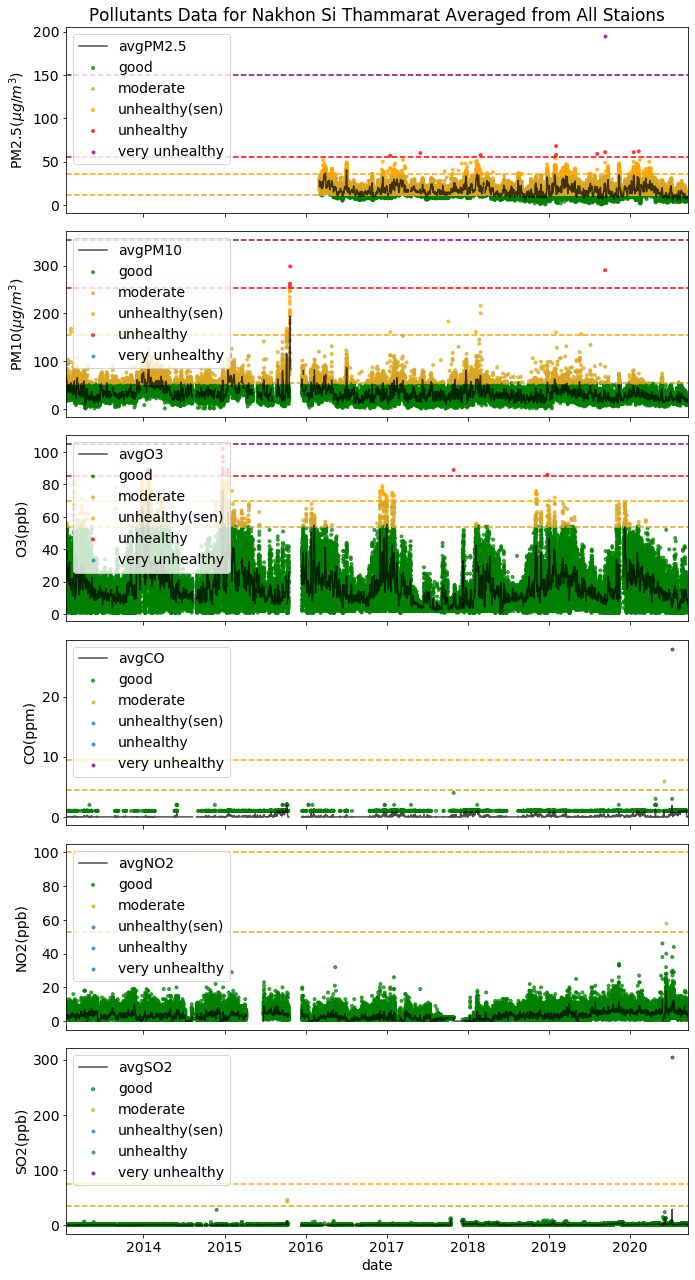

In [31]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)

Actually, we are seeing some seasonal pattern in PM2.5, PM10 and O$_3$.

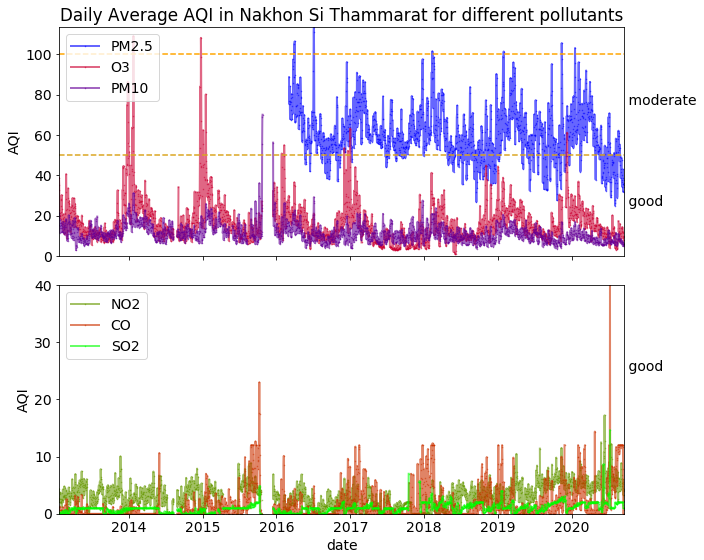

In [37]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

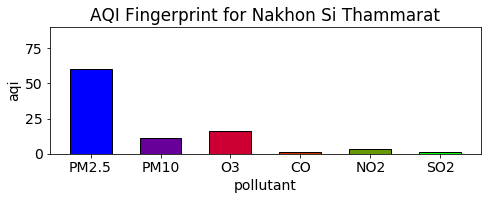

In [38]:
plot_chem_print(poll_to_aqi(dataset.poll_df.copy(), dataset.roll_dict).mean(axis=0), dataset.city_name, filename=dataset.report_folder + 'fingerprint.png')

In [40]:
dataset.poll_df['PM10'].dropna().head()

datetime
2013-01-19 00:00:00    68.0
2013-01-19 01:00:00    58.0
2013-01-19 02:00:00    60.0
2013-01-19 03:00:00    57.0
2013-01-19 04:00:00    46.0
Name: PM10, dtype: float64

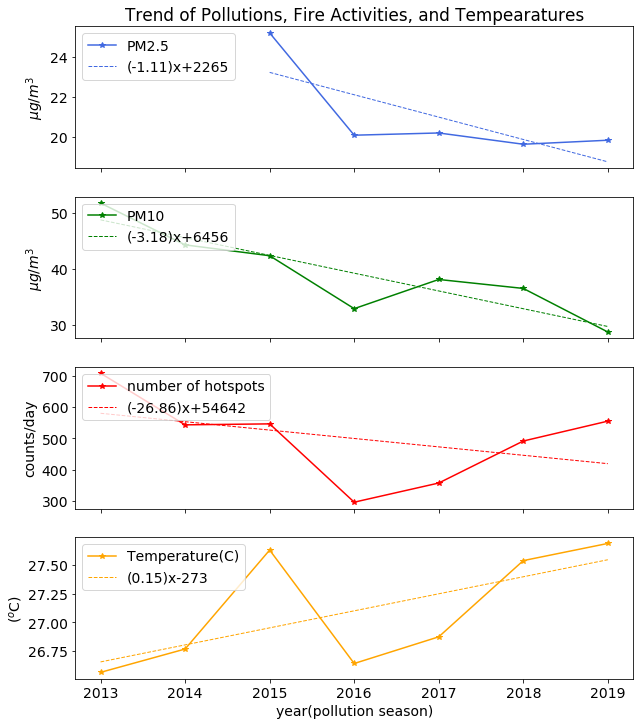

In [42]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png', min_year=2013)

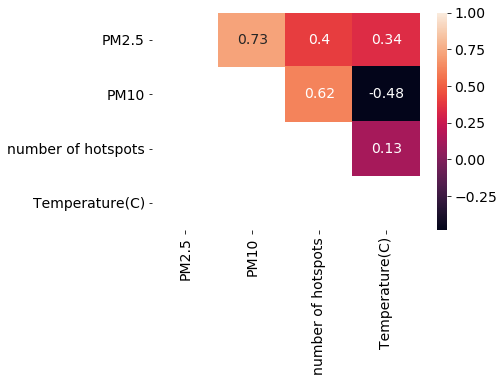

In [43]:
plot_corr(year_avg, figsize=(6,4))

In [ ]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5', filename=dataset.report_folder + 'seasonal_pattern_PM25.png')
plt.ylim([0, 100])
plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25.png')

In [ ]:
ax = compare_seson_avg(dataset, agg='mean')
#ax[3].set_ylim([0,15])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

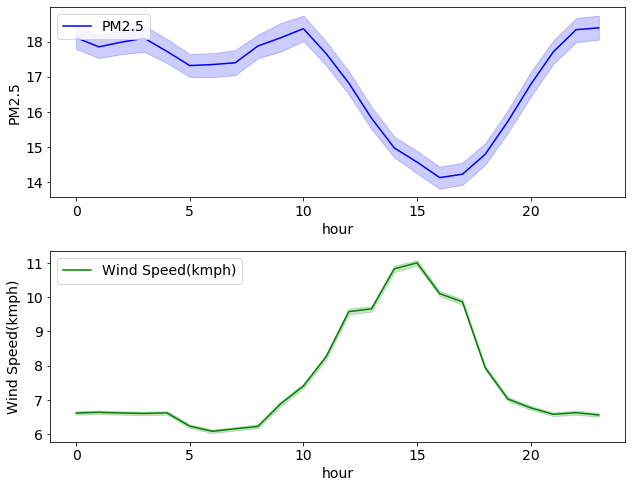

In [46]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

# Train Model

data no fire has shape (38855, 13)
use default fire feature
=================optimize 1: find the best RF model=================
{'n_estimators': 160, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True} 0.11351648306567522
optimize 1 score {'val_r2_score': 0.16916325651694275, 'val_mean_squared_error': 52.44278886900761, 'val_mean_absolute_error': 5.586386013042681}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop Wind Speed(kmph)
drop fire_0_200
use columns ['Temperature(C)', 'Humidity(%)', 'wind_E', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.17494193144518766, 'mean_squared_error': 52.07803630891485, 'mean_absolute_error': 5.581005680789802}
================= optimization 3: find the best fire feature ===================
skop_ fire use x_cols ['Temp

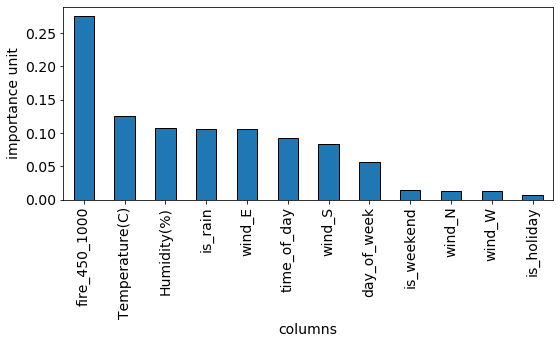

In [50]:
%%time
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='PM2.5')

In [51]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM2.5')

data no fire has shape (39042, 13)
raw model performance {'test_r2_score': 0.21549968148249876, 'test_mean_squared_error': 40.273203357962146, 'test_mean_absolute_error': 5.068892226067817}
daily avg training error {'avg_trn_r2_score': 0.6768287428749784, 'avg_trn_mean_squared_error': 9.570417531778563, 'avg_trn_mean_absolute_error': 2.3291218129244613}
daily avg test error {'avg_test_r2_score': 0.29966857950628034, 'avg_test_mean_squared_error': 24.941339482334197, 'avg_test_mean_absolute_error': 4.028029061833334}


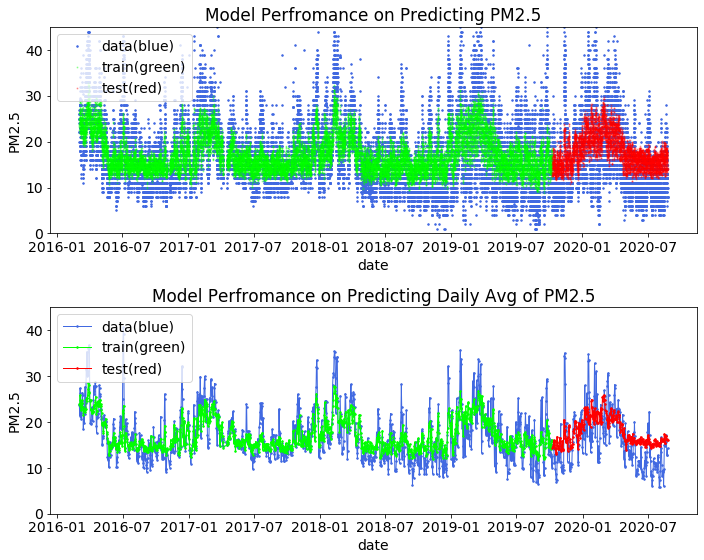

In [56]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.8, 0.2], ylim=[0, 45], to_save=False)


data no fire has shape (62591, 13)
use default fire feature
=================optimize 1: find the best RF model=================
{'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True} 0.11745317452136864
optimize 1 score {'val_r2_score': 0.19155926224744102, 'val_mean_squared_error': 197.69741165219705, 'val_mean_absolute_error': 10.788208899115935}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_weekend
drop wind_S
drop day_of_week
drop fire_200_450
use columns ['Temperature(C)', 'Humidity(%)', 'Wind Speed(kmph)', 'wind_E', 'wind_N', 'wind_W', 'is_rain', 'is_holiday', 'time_of_day', 'fire_0_200', 'fire_450_1000']
score after dropping columns {'r2_score': 0.20660033488643204, 'mean_squared_error': 194.01924330869215, 'mean_absolute_error': 10.672387578666942}
================= optimization 3: find the best fire feature ===================
skop_ fire use x_col

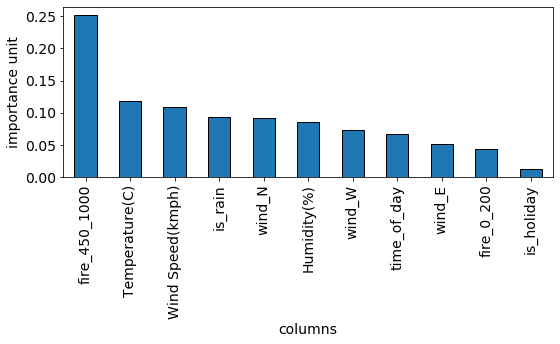

In [57]:
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='PM10')

In [58]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM10')

data no fire has shape (63034, 13)
raw model performance {'test_r2_score': -0.3872317662906821, 'test_mean_squared_error': 173.090039818234, 'test_mean_absolute_error': 10.58349454667971}
daily avg training error {'avg_trn_r2_score': 0.7121634815159101, 'avg_trn_mean_squared_error': 59.300528359025876, 'avg_trn_mean_absolute_error': 5.0741280328442455}
daily avg test error {'avg_test_r2_score': -0.7683746535194873, 'avg_test_mean_squared_error': 113.45326174497423, 'avg_test_mean_absolute_error': 8.957035782577654}


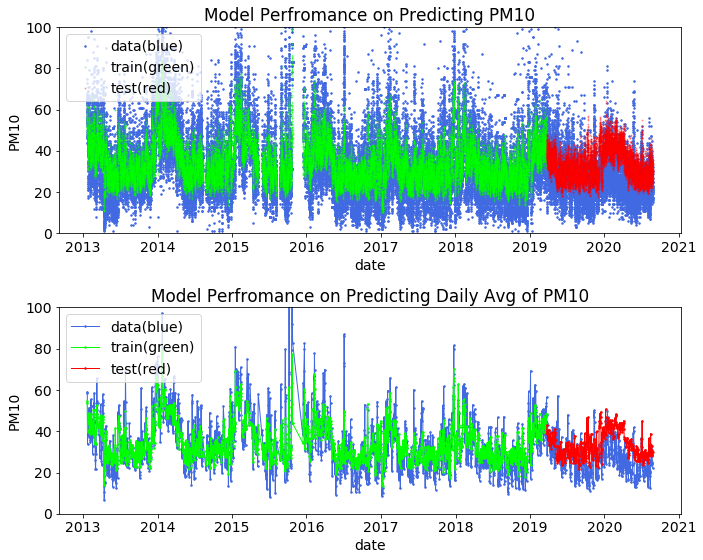

In [61]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.8, 0.2], ylim=[0, 100], to_save=False)
